<a href="https://colab.research.google.com/github/9-coding/CLIP_AI/blob/main/Object_Detection_YOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/gdrive/')

path = '/content/gdrive/MyDrive/Colab Notebooks/Solution_Challenge/'
weight = path+'/train/weights/best.pt'
%cd '/content/gdrive/MyDrive/Colab Notebooks/Solution_Challenge/'

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
/content/gdrive/MyDrive/Colab Notebooks/Solution_Challenge


In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.3/709.3 kB 10.2 MB/s eta 0:00:00


In [3]:
from ultralytics import YOLO
import cv2

# Load a model
model = YOLO("yolov8n.pt")  # build a new model from scratch

In [9]:
results=model.train(data=path+"dataset/bottle_food/data.yaml", epochs=50, project=path, exist_ok=True, verbose=True)  # train the model

Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/gdrive/MyDrive/Colab Notebooks/Solution_Challenge/dataset/bottle_food/data.yaml, epochs=50, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/gdrive/MyDrive/Colab Notebooks/Solution_Challenge/, name=train, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=F

train: Scanning /content/gdrive/MyDrive/Colab Notebooks/Solution_Challenge/dataset/bottle_food/train/labels.cache... 2057 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2057/2057 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/gdrive/MyDrive/Colab Notebooks/Solution_Challenge/dataset/bottle_food/valid/labels.cache... 190 images, 0 backgrounds, 0 corrupt: 100%|██████████| 190/190 [00:00<?, ?it/s]


Plotting labels to /content/gdrive/MyDrive/Colab Notebooks/Solution_Challenge/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000588, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/gdrive/MyDrive/Colab Notebooks/Solution_Challenge/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50       2.6G      1.333       1.99      1.624         28        640: 100%|██████████| 129/129 [00:57<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.52it/s]

                   all        190        560      0.747       0.63      0.743      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.33G      0.811      1.158      1.249         12        640: 100%|██████████| 129/129 [00:54<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.96it/s]

                   all        190        560      0.727      0.733      0.793      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.33G     0.7332     0.9757      1.195         30        640: 100%|██████████| 129/129 [00:56<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.21it/s]

                   all        190        560      0.709      0.778      0.788      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.34G     0.6945     0.8666      1.164         12        640: 100%|██████████| 129/129 [00:54<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.83it/s]

                   all        190        560      0.736      0.727      0.771      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.33G     0.6663     0.7848      1.139         15        640: 100%|██████████| 129/129 [00:53<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.36it/s]

                   all        190        560      0.839      0.795      0.864      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.34G     0.6457     0.7216      1.126         34        640: 100%|██████████| 129/129 [00:54<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.10it/s]

                   all        190        560      0.804      0.808      0.861       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.22G     0.6261     0.6628      1.108         25        640: 100%|██████████| 129/129 [00:54<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.50it/s]

                   all        190        560       0.87      0.801      0.876      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.34G     0.6003     0.6523      1.089         30        640: 100%|██████████| 129/129 [00:54<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.04it/s]

                   all        190        560      0.861      0.808      0.891       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.33G     0.6021     0.6017      1.092         22        640: 100%|██████████| 129/129 [00:54<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.22it/s]

                   all        190        560      0.862      0.835      0.892      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.33G     0.5895     0.5897      1.078         14        640: 100%|██████████| 129/129 [00:56<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.43it/s]

                   all        190        560      0.889      0.821      0.897      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.33G     0.5828     0.5778      1.076         30        640: 100%|██████████| 129/129 [00:54<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.05it/s]

                   all        190        560      0.872      0.833      0.893      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.34G     0.5683     0.5451      1.061         29        640: 100%|██████████| 129/129 [00:54<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.02it/s]

                   all        190        560      0.863      0.802      0.869      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.34G     0.5641     0.5334       1.06         30        640: 100%|██████████| 129/129 [00:55<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.12it/s]

                   all        190        560      0.867      0.839      0.892      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.35G     0.5573     0.5165      1.053         24        640: 100%|██████████| 129/129 [00:54<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.17it/s]

                   all        190        560      0.825      0.857      0.903       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.33G     0.5511        0.5      1.049         43        640: 100%|██████████| 129/129 [00:54<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.39it/s]

                   all        190        560      0.902      0.837      0.898      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.33G     0.5418     0.4975      1.042         35        640: 100%|██████████| 129/129 [00:55<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.12it/s]

                   all        190        560      0.832      0.846       0.88      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.34G     0.5388     0.4857      1.044         38        640: 100%|██████████| 129/129 [00:55<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.40it/s]

                   all        190        560      0.849      0.841       0.89       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.34G     0.5334     0.4752      1.034         24        640: 100%|██████████| 129/129 [00:57<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.14it/s]

                   all        190        560      0.877      0.842      0.899       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.32G     0.5347     0.4657      1.042         32        640: 100%|██████████| 129/129 [00:54<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.66it/s]

                   all        190        560      0.875      0.828      0.881      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.34G     0.5223      0.446      1.027         25        640: 100%|██████████| 129/129 [00:52<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.48it/s]

                   all        190        560      0.845      0.859      0.903      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.33G     0.5197     0.4392      1.028         25        640: 100%|██████████| 129/129 [00:54<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.14it/s]

                   all        190        560      0.869      0.855      0.908       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.34G     0.5184     0.4363      1.025         29        640: 100%|██████████| 129/129 [00:54<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.30it/s]

                   all        190        560       0.89      0.871      0.899      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.33G     0.5142     0.4342      1.034         43        640: 100%|██████████| 129/129 [00:53<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.29it/s]

                   all        190        560      0.882      0.862      0.914      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.22G     0.5096     0.4318      1.021         16        640: 100%|██████████| 129/129 [00:55<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.99it/s]

                   all        190        560      0.852      0.838      0.884      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.34G     0.5048     0.4208      1.013         37        640: 100%|██████████| 129/129 [00:57<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.13it/s]

                   all        190        560      0.899      0.864      0.902      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.34G     0.5016     0.4178       1.02         32        640: 100%|██████████| 129/129 [00:54<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.42it/s]

                   all        190        560      0.883      0.853       0.89      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.33G     0.4981      0.405      1.019         28        640: 100%|██████████| 129/129 [00:53<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.06it/s]

                   all        190        560      0.904       0.84      0.905       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.33G     0.4894     0.3938      1.011         22        640: 100%|██████████| 129/129 [00:54<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.42it/s]

                   all        190        560       0.89      0.853      0.897      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.33G     0.4853     0.3914     0.9984         25        640: 100%|██████████| 129/129 [00:55<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.51it/s]

                   all        190        560       0.89      0.859      0.902      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.34G      0.486     0.3839      1.009         29        640: 100%|██████████| 129/129 [00:54<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.88it/s]

                   all        190        560      0.891      0.855      0.911       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.32G     0.4794      0.378          1         28        640: 100%|██████████| 129/129 [00:54<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.98it/s]

                   all        190        560      0.874       0.88      0.907      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.34G     0.4728     0.3808          1         28        640: 100%|██████████| 129/129 [00:57<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.26it/s]

                   all        190        560      0.906      0.873      0.912      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.35G     0.4754     0.3681      1.001         14        640: 100%|██████████| 129/129 [00:54<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.25it/s]

                   all        190        560      0.871      0.885      0.912      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.34G     0.4663     0.3741       0.99         19        640: 100%|██████████| 129/129 [00:54<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.45it/s]

                   all        190        560      0.891      0.884      0.913      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.21G     0.4669     0.3618     0.9883         20        640: 100%|██████████| 129/129 [00:54<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.92it/s]

                   all        190        560      0.892      0.884      0.912      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.34G     0.4657     0.3654      0.993         19        640: 100%|██████████| 129/129 [00:54<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.48it/s]

                   all        190        560      0.887       0.87      0.917      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.34G     0.4568     0.3536     0.9871         25        640: 100%|██████████| 129/129 [00:55<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.58it/s]

                   all        190        560      0.917      0.852      0.904      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.34G      0.455     0.3485     0.9858         13        640: 100%|██████████| 129/129 [00:53<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.18it/s]

                   all        190        560      0.909      0.863      0.913      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.33G     0.4563     0.3473     0.9806         24        640: 100%|██████████| 129/129 [00:56<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.63it/s]

                   all        190        560      0.895      0.861      0.915      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.34G     0.4469     0.3415     0.9794         32        640: 100%|██████████| 129/129 [00:54<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.35it/s]

                   all        190        560      0.871      0.879       0.91      0.755


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.47G     0.4542     0.3489     0.9827         25        640: 100%|██████████| 129/129 [00:56<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.07it/s]

                   all        190        560      0.911      0.873      0.916      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.33G     0.4486     0.3398       0.98         26        640: 100%|██████████| 129/129 [00:54<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.67it/s]

                   all        190        560      0.904       0.86       0.91      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.33G     0.4379     0.3343     0.9775         17        640: 100%|██████████| 129/129 [00:53<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.43it/s]

                   all        190        560      0.885       0.87       0.91       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.32G      0.443     0.3273     0.9749         38        640: 100%|██████████| 129/129 [00:53<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.99it/s]

                   all        190        560      0.916      0.843      0.911      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.34G     0.4446     0.3327     0.9785         34        640: 100%|██████████| 129/129 [00:54<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.27it/s]

                   all        190        560      0.896      0.879      0.906       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.33G     0.4302     0.3242     0.9696         12        640: 100%|██████████| 129/129 [00:56<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.00it/s]

                   all        190        560      0.921      0.861      0.907      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.32G     0.4323      0.325     0.9708         22        640: 100%|██████████| 129/129 [00:54<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.59it/s]

                   all        190        560      0.899      0.882      0.908      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.34G     0.4311     0.3251     0.9687         30        640: 100%|██████████| 129/129 [00:55<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.09it/s]

                   all        190        560      0.876      0.877      0.905       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.34G     0.4326      0.324     0.9654         28        640: 100%|██████████| 129/129 [00:54<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.28it/s]

                   all        190        560       0.89      0.873      0.907      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.34G     0.4285     0.3203     0.9674         17        640: 100%|██████████| 129/129 [00:55<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.23it/s]

                   all        190        560      0.886      0.876      0.905       0.76



50 epochs completed in 0.827 hours.
Optimizer stripped from /content/gdrive/MyDrive/Colab Notebooks/Solution_Challenge/train/weights/last.pt, 6.3MB
Optimizer stripped from /content/gdrive/MyDrive/Colab Notebooks/Solution_Challenge/train/weights/best.pt, 6.3MB

Validating /content/gdrive/MyDrive/Colab Notebooks/Solution_Challenge/train/weights/best.pt...
Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3008183 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.41s/it]


                   all        190        560      0.879      0.875      0.917      0.769
         BoullionSpoon        190         15      0.707      0.933      0.908       0.72
               Chicken        190         77      0.737       0.69       0.77      0.405
           Entreeplate        190         38      0.903      0.974       0.95      0.929
              EvilBowl        190         39      0.759      0.974      0.906      0.872
             LargeBowl        190         20      0.952      0.994      0.993      0.987
             SaladBowl        190         24      0.868      0.875       0.88      0.873
            SmallPlate        190         16      0.878       0.75      0.871      0.838
              SoupBowl        190         36      0.983       0.75      0.881      0.831
                   cup        190         44      0.986      0.977      0.995      0.836
                  fork        190         55      0.836      0.929       0.98      0.743
                 knif

In [7]:
import os
# 디렉토리 내의 모든 파일 목록을 반환하는 함수
def list_files(directory, extensions=None):
    file_list = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if extensions is None or file.endswith(extensions):
                file_list.append(os.path.join(root, file))
    return file_list


image 1/1 /content/gdrive/MyDrive/Colab Notebooks/Solution_Challenge/samples/bottle_1.jpeg: 640x640 (no detections), 9.4ms
Speed: 3.1ms preprocess, 9.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/gdrive/MyDrive/Colab Notebooks/Solution_Challenge/train


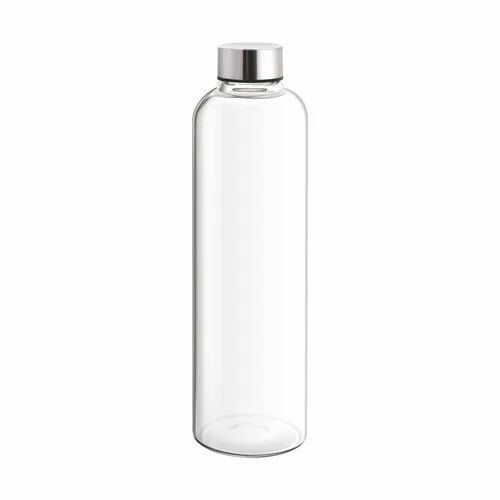


image 1/1 /content/gdrive/MyDrive/Colab Notebooks/Solution_Challenge/samples/food_1.jpg: 480x640 1 Entreeplate, 1 LargeBowl, 1 cup, 1 fork, 1 knife, 10.0ms
Speed: 2.5ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)
Results saved to /content/gdrive/MyDrive/Colab Notebooks/Solution_Challenge/train


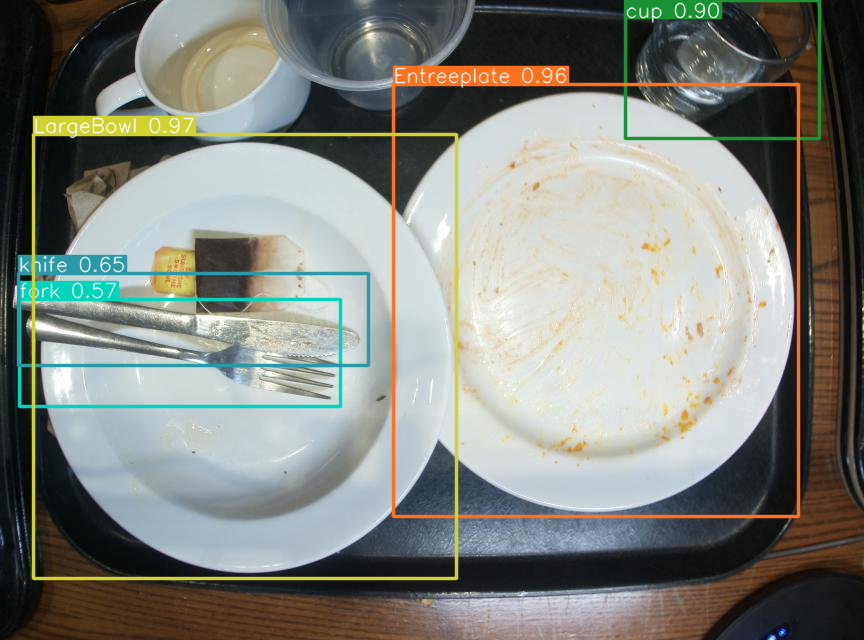


image 1/1 /content/gdrive/MyDrive/Colab Notebooks/Solution_Challenge/samples/food_2.jpg: 480x640 1 BoullionSpoon, 1 Entreeplate, 1 EvilBowl, 1 SaladBowl, 1 SoupBowl, 1 fork, 1 knife, 1 spoon, 12.4ms
Speed: 3.6ms preprocess, 12.4ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)
Results saved to /content/gdrive/MyDrive/Colab Notebooks/Solution_Challenge/train


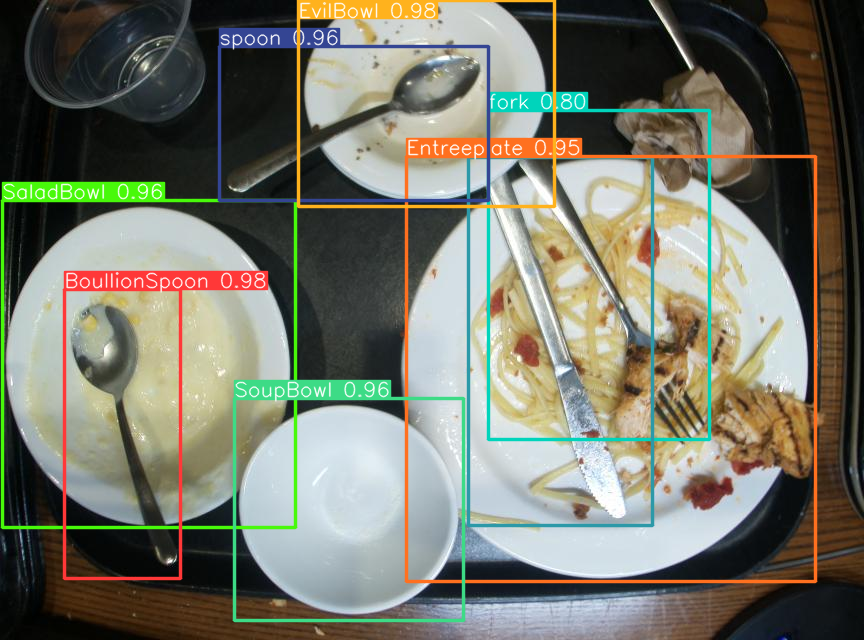


image 1/1 /content/gdrive/MyDrive/Colab Notebooks/Solution_Challenge/samples/food_3.jpg: 480x640 1 Entreeplate, 1 SaladBowl, 1 fork, 1 knife, 1 spoon, 13.4ms
Speed: 3.8ms preprocess, 13.4ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)
Results saved to /content/gdrive/MyDrive/Colab Notebooks/Solution_Challenge/train


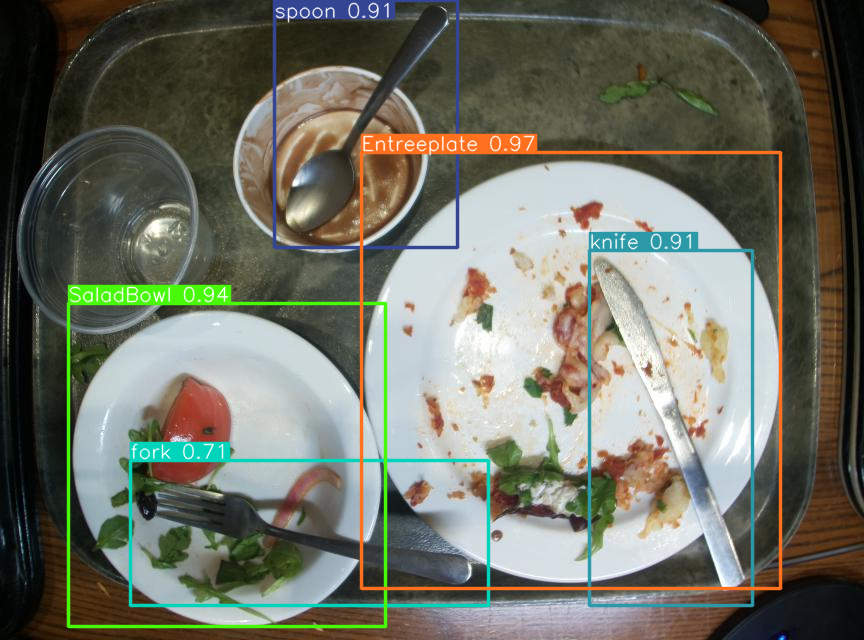


image 1/1 /content/gdrive/MyDrive/Colab Notebooks/Solution_Challenge/samples/chicken.jpeg: 384x640 1 Chicken, 19.4ms
Speed: 3.2ms preprocess, 19.4ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/gdrive/MyDrive/Colab Notebooks/Solution_Challenge/train


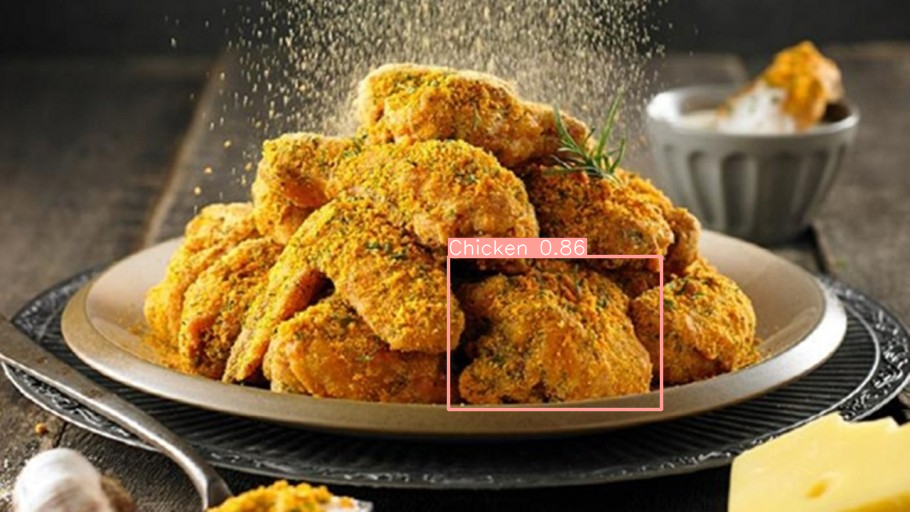


image 1/1 /content/gdrive/MyDrive/Colab Notebooks/Solution_Challenge/samples/bottle_with_label_1.jpeg: 640x480 1 label, 12.0ms
Speed: 3.5ms preprocess, 12.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)
Results saved to /content/gdrive/MyDrive/Colab Notebooks/Solution_Challenge/train


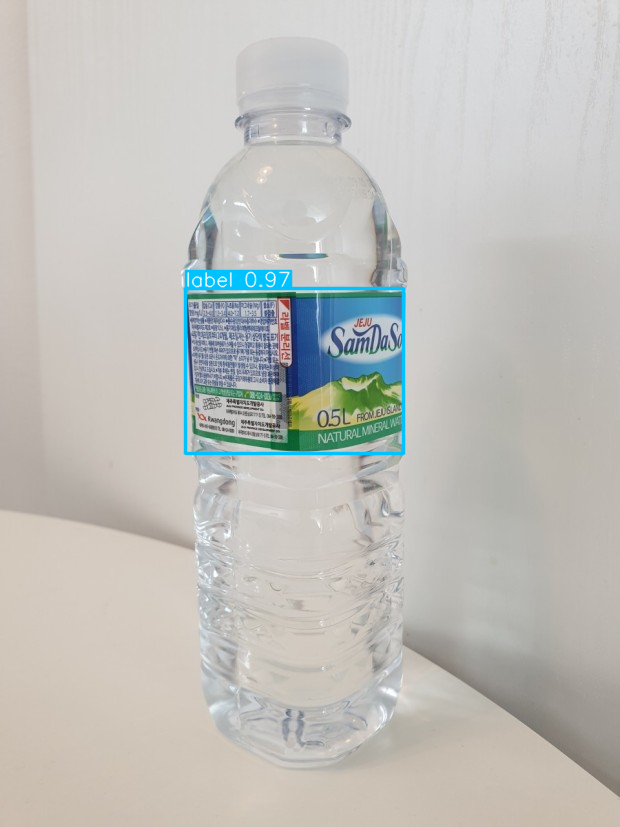


image 1/1 /content/gdrive/MyDrive/Colab Notebooks/Solution_Challenge/samples/bottle_with_label_4.jpeg: 640x352 1 label, 13.6ms
Speed: 2.5ms preprocess, 13.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 352)
Results saved to /content/gdrive/MyDrive/Colab Notebooks/Solution_Challenge/train


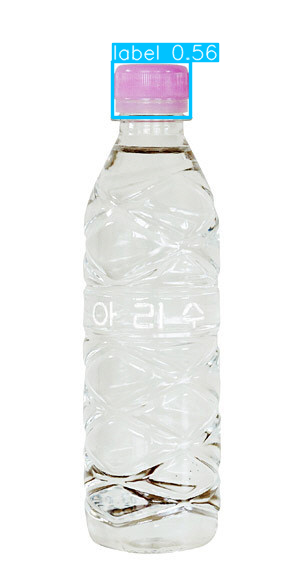


image 1/1 /content/gdrive/MyDrive/Colab Notebooks/Solution_Challenge/samples/bottle_with_label_2.jpg: 640x640 1 label, 13.6ms
Speed: 3.5ms preprocess, 13.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/gdrive/MyDrive/Colab Notebooks/Solution_Challenge/train


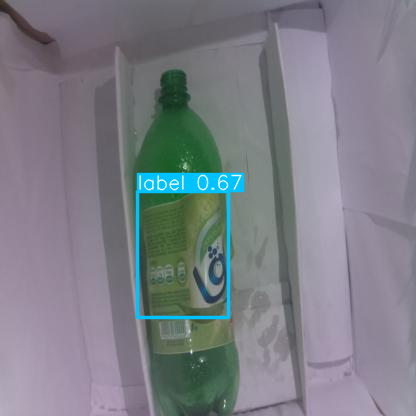

In [11]:
from google.colab.patches import cv2_imshow
import cv2
directory = path + "/samples/"

image_files = list_files(directory, extensions=('.jpg', '.jpeg', '.png'))

for image_file in image_files:
    # 모델 실행 코드
    result = model(image_file, conf=0.5, save=True)
    cv2_imshow(result[0].plot())

cv2.waitKey(0)
cv2.destroyAllWindows()